In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import xrspatial as xrs
import numpy as np
import xarray as xr
from pathlib import Path
import hvplot.xarray

### Purpose

This notebook exists to demonstrate that we are starting with two distinctly different input grids. The grids are derived from CMIP6 GCMs that have been used to develop daily 'weather' by means of the Weather Research and Forecast model. The netCDF files are generated by the SWB model; they should simply be echoing the inputs to SWB. We're testing this just to make sure that the SWB model is actually being fed different daily inputs.

The question to be answered is: are these two daily weather data files different?

### Outcome

_The grids that SWB uses as input are indeed different._ We should expect that statstics calculated on these grids will also be different from one another.

In [2]:
cwd = Path.cwd()
datadir = cwd.parent / 'data'

# these files came from Hovenweep
bcc_filepath = datadir / "historical__gross_precipitation__bcc_csm2-mr__1995-01-01_to_2000-12-31__172_by_155.nc"
cnrm_filepath = datadir / "historical__gross_precipitation__cnrm_esm2-1__1995-01-01_to_2000-12-31__172_by_155.nc"

In [3]:
# raw daily SWB output for gross precipitation, BCC model as weather driver:
ds_bcc = xr.open_dataset(bcc_filepath, decode_coords=True, decode_cf=True)
# raw daily SWB output for gross precipitation, CNRM model as weather driver:
ds_cnrm = xr.open_dataset(cnrm_filepath, decode_coords=True, decode_cf=True)

### Generate annual sum grids from the inputs

In [12]:
ds_bcc_annual_sum = ds_bcc['gross_precipitation'].sum(dim="time") / 6
ds_cnrm_annual_sum = ds_cnrm['gross_precipitation'].sum(dim="time") / 6

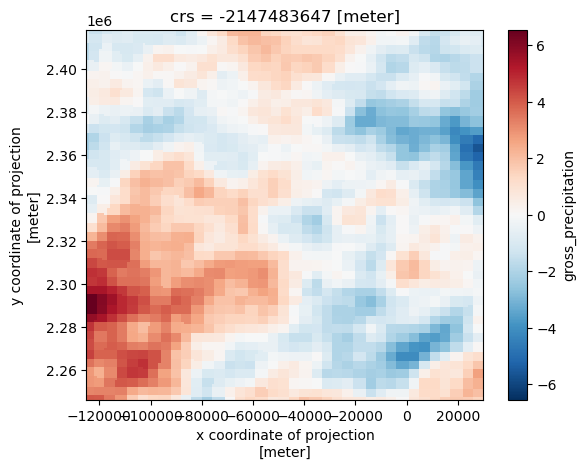

In [13]:
# calculate a difference grid and plot it
diff = ds_bcc_annual_sum - ds_cnrm_annual_sum
diff.plot()